
<style>
h1 {text-align: center; font-family: "Times New Roman"; }
h2 {text-align: center; font-family: "Times New Roman";}
p {text-align: left; font-family: "Times New Roman";}
</style>
<h1><b><u>ASSIGNMENT 1</u></b></h1> 
<h2>Team Student Ensemble</h2>

## Q1

<style>p {text-align: left; font-family: "Times New Roman";}</style>

<p>1. Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? <b>[1 marks]</b></p>

In [6]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install tsfel

Note: you may need to restart the kernel to use updated packages.


In [9]:
## Importing the libraries
import numpy as np
import os
import pandas as pd
from MakeDataset import X_train, X_test, y_train, y_test,X_val,y_val
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import latexify
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import pickle
import plotly.express as px
import tsfel
from sklearn import tree

In [10]:
## Combining the train and Validation parts of the dataset
X_combined = np.concatenate((X_train,X_test,X_val),axis=0)
y_combined = np.concatenate((y_train,y_test,y_val),axis=0)
X_combined.shape,y_combined.shape

((180, 500, 3), (180,))

In [11]:
def plot_3d(X,activity,ax):
    # Function for plotting the 3D scatter plot
    ax.scatter(X[:,0],X[:,1],X[:,2],c='blue',marker='o',s=20,label=activity)
    ax.set_xlabel('a_x')
    ax.set_ylabel('a_y')
    ax.set_zlabel('a_z')
    ax.set_title(activity)
    
X_activity = {}
activities = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"] # Array of various activities
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6} # Dictionary for mapping activities to classes
for i in range(len(activities)):
    X_activity[activities[i]] = X_combined[y_combined==classes[activities[i]]]
    print(f"Activity: {activities[i]} length = {X_activity[activities[i]].shape}")
# X_activity is the dict containing the data for each activity

Activity: WALKING length = (30, 500, 3)
Activity: WALKING_UPSTAIRS length = (30, 500, 3)
Activity: WALKING_DOWNSTAIRS length = (30, 500, 3)
Activity: SITTING length = (30, 500, 3)
Activity: STANDING length = (30, 500, 3)
Activity: LAYING length = (30, 500, 3)


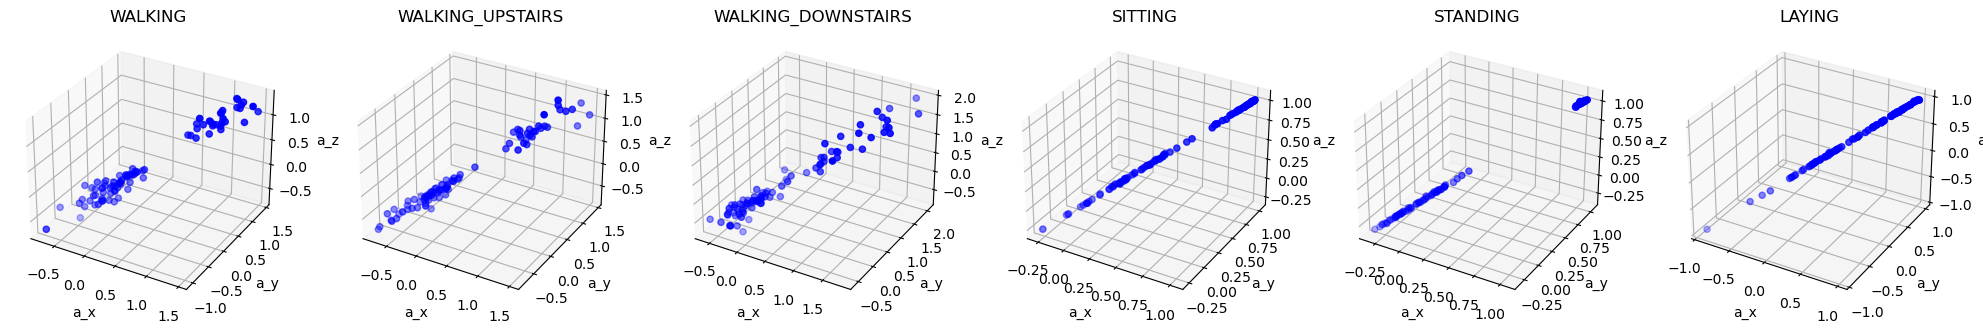

In [12]:
time = np.arange(100,600)
fig,ax = plt.subplots(1,6,figsize=(25,25),subplot_kw=dict(projection='3d'))
for i in range(len(activities)): #plotting the 3D distributions of aX,aY,aZ for each activity
    ax[i].scatter(X_activity[activities[i]][:,0],X_activity[activities[i]][:,1],X_activity[activities[i]][:,2],c='blue',marker='o',s=20)
    ax[i].set_xlabel('a_x')
    ax[i].set_ylabel('a_y')
    ax[i].set_zlabel('a_z')
    ax[i].set_title(activities[i])

plt.show()

<style>p {text-align: left; font-family: "Times New Roman";}</style>

<p>We can observe from the 3D plots of these activities that the datapoints for static activities such as Sitting, Standing and Laying is quite linear, whereas that for the other activities (dynamic ones) is very scattered.</p>

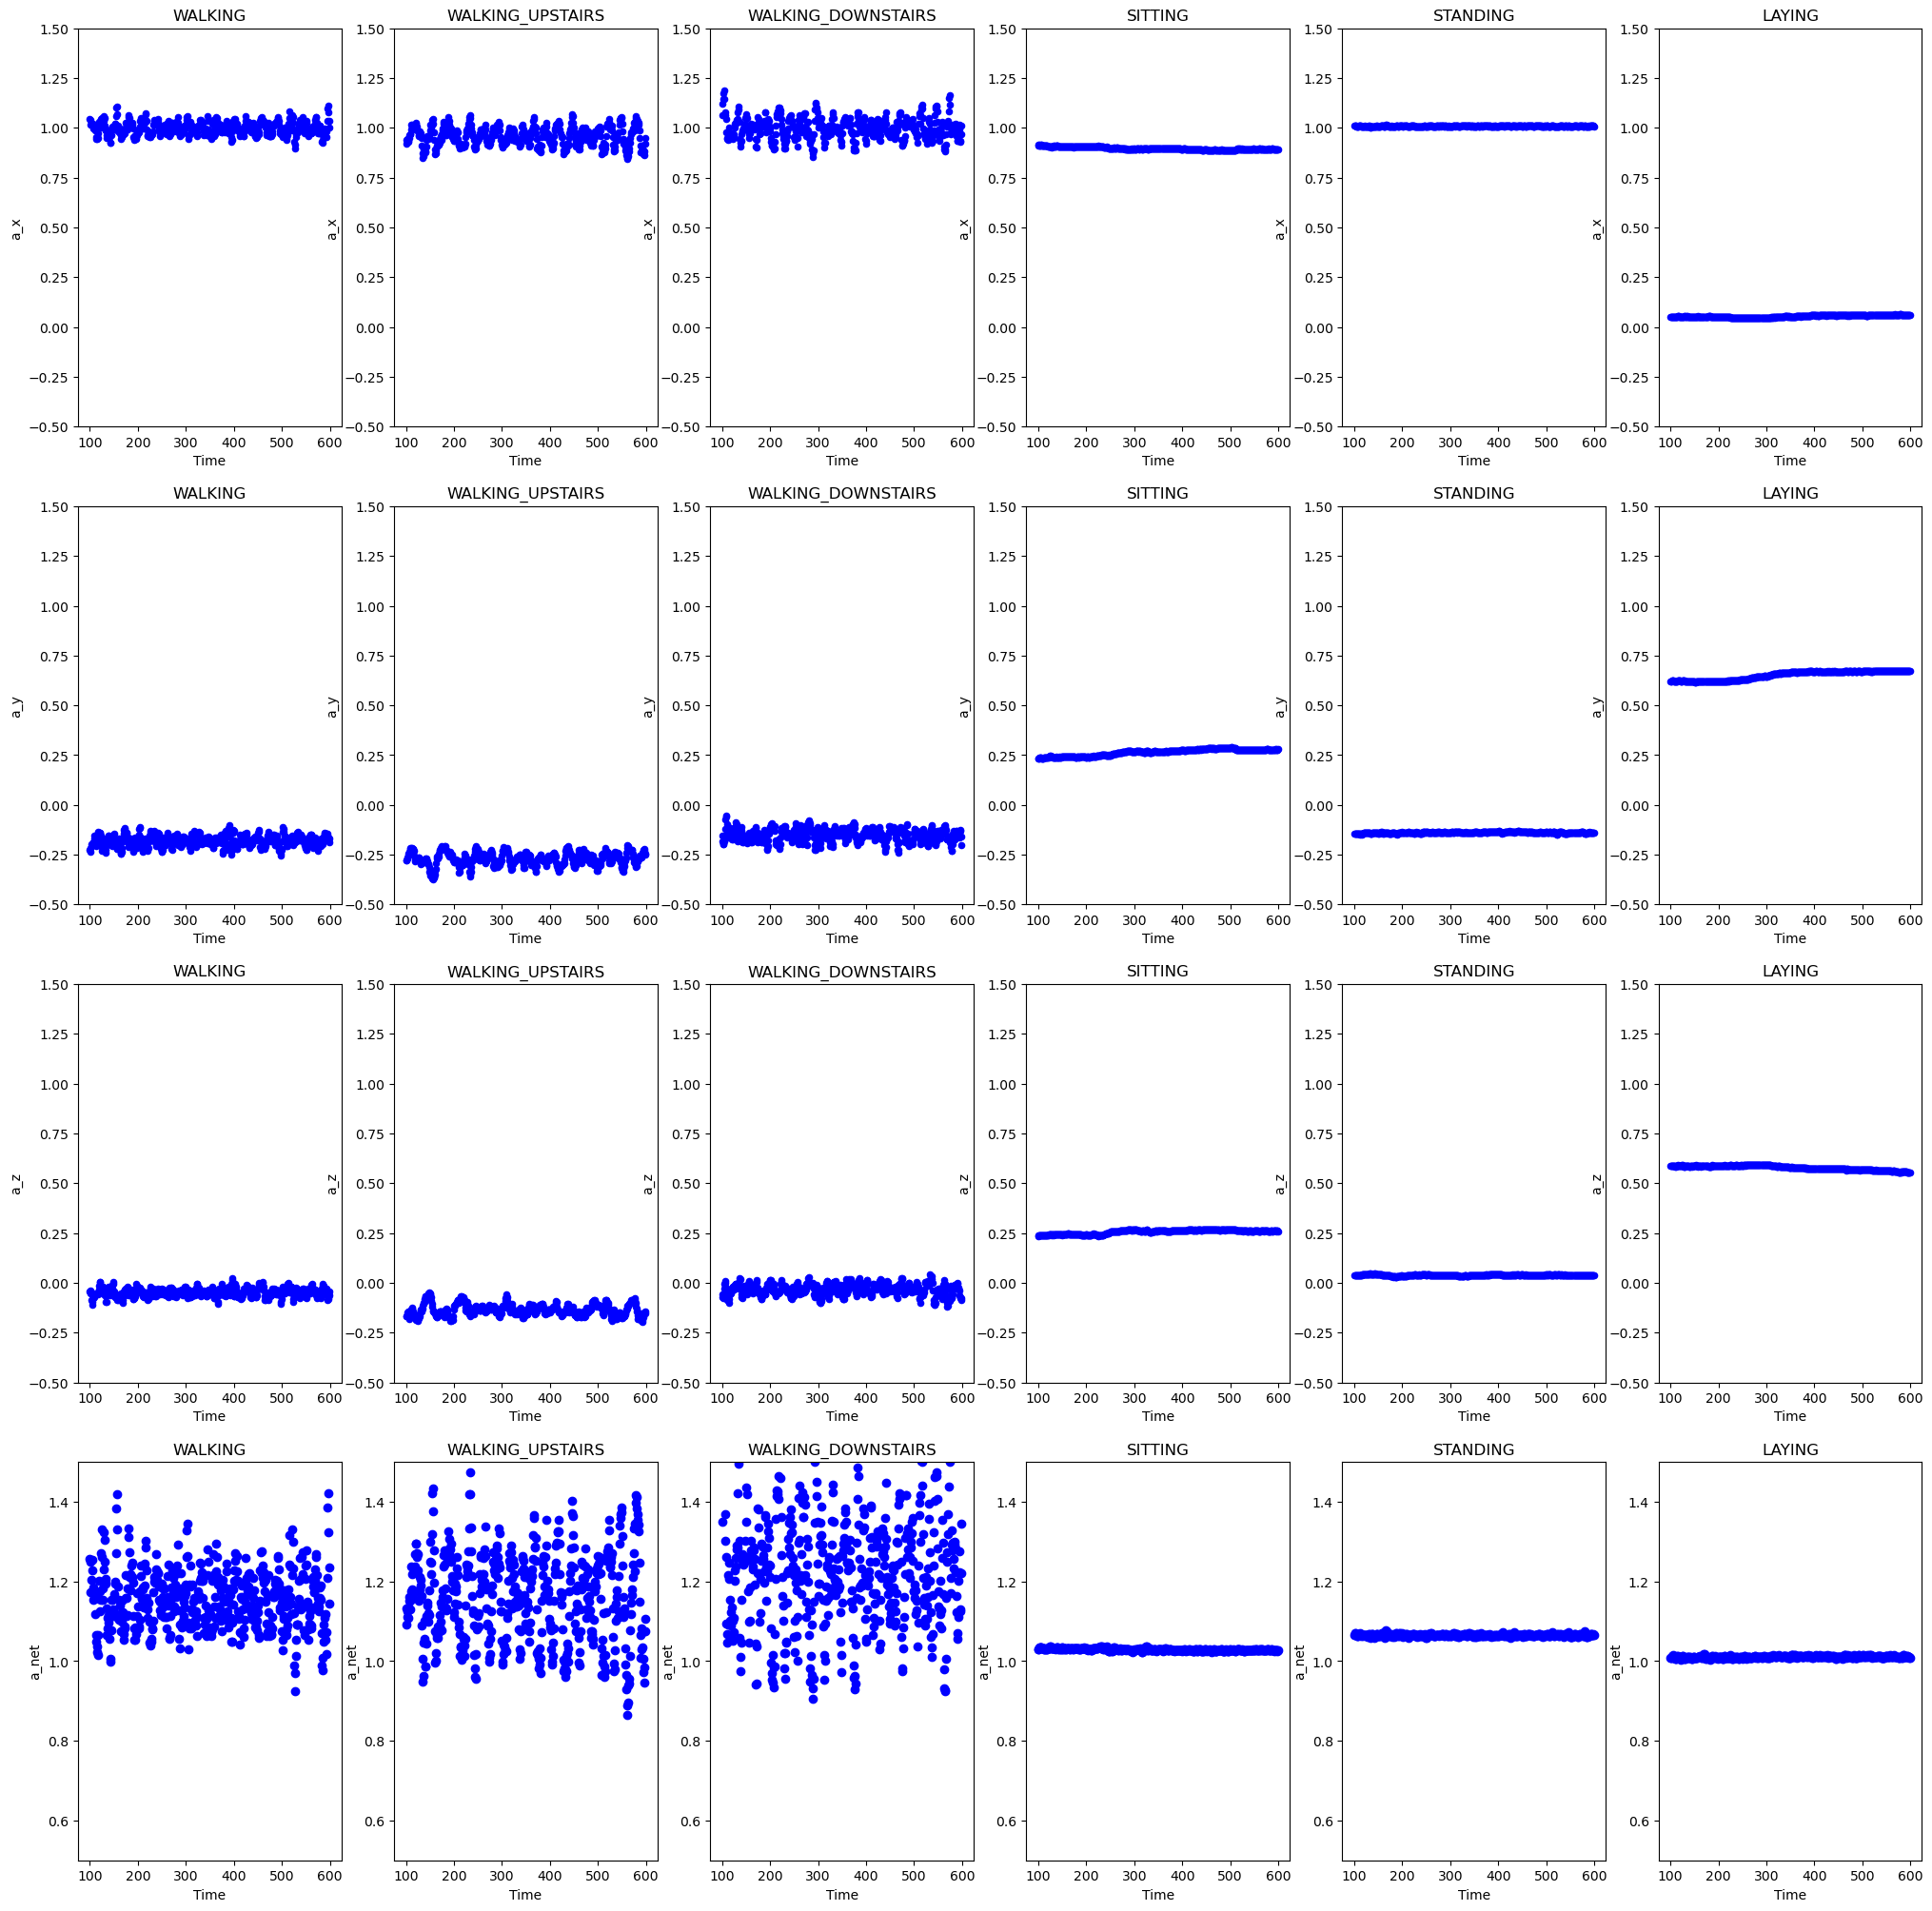

In [14]:
fig,ax = plt.subplots(4,6,figsize=(25,25))
j=0
for i in range(len(activities)): #plotting the 3D distributions of aX for each activity
    ax[j,i].scatter(time,X_activity[activities[i]][:,:,0].mean(axis=0),c='blue',marker='o',s=20)
    ax[j,i].set_xlabel('Time')
    ax[j,i].set_ylabel('a_x')
    ax[j,i].set_title(activities[i])
    ax[j,i].set_ylim(-0.5,1.5)
j=1
for i in range(len(activities)): #plotting the 3D distributions of aY for each activity
    ax[j,i].scatter(time,X_activity[activities[i]][:,:,1].mean(axis=0),c='blue',marker='o',s=20)
    ax[j,i].set_xlabel('Time')
    ax[j,i].set_ylabel('a_y')
    ax[j,i].set_title(activities[i])
    ax[j,i].set_ylim(-0.5,1.5)
j=2
for i in range(len(activities)): #plotting the 3D distributions of aZ for each activity
    ax[j,i].scatter(time,X_activity[activities[i]][:,:,2].mean(axis=0),c='blue',marker='o',s=20)
    ax[j,i].set_xlabel('Time')
    ax[j,i].set_ylabel('a_z')
    ax[j,i].set_title(activities[i])
    ax[j,i].set_ylim(-0.5,1.5)
# net acc
j=3
for i in range(len(activities)): #plotting the 3D distributions of a_net for each activity
    net_acc = np.sum(X_activity[activities[i]]**2,axis=2)
    ax[j,i].scatter(time,net_acc.mean(axis=0),c='blue',marker='o')
    ax[j,i].set_xlabel('Time')
    ax[j,i].set_ylabel('a_net')
    ax[j,i].set_title(activities[i])
    ax[j,i].set_ylim(0.5,1.5)
plt.show()

<style>
    p{font-family:"Times New Roman"}
</style>

<p> We have plotted the data for a time instance of 10s, (a total 500 instances from indices 100 to 600) at a frequency of 50Hz. We can observe from the time series plots as given above that the distribution of <b>LAYING</b>, <b>SITTING</b>, and <b>STANDING</b> are relatively constant and "calm". However, the data of <b>WALKING</b>, <b>WALKING_DOWNWARD</b>, and <b>WALKING_UPWARD</b> are relatively more scattered and not constant. Talking in terms of statistics we can see that the mean of <i>a_x</i> while laying is almost zero, contrary to the other activities. It is also very constant. The mean of a_y is for **SITTING** is around 0.25 contrary to other models. The value of a_x, a_y, and a_z for standing is also very constant compared to that of other walking based activities. It may be more difficult to distinguish between <b>WALKING</b>, <b>WALKING_DOWNWARD</b>, and <b>WALKING_UPWARD</b> based on the initial observations and we may even need to look through some other time series functions for further understanding.

## Q2

<style>
    p{font-family:"Times New Roman";}
</style>

<p>2. Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration acc<sub>x</sub><sup>2</sup>+acc<sub>y</sub><sup>2</sup>+acc<sub>z</sub><sup>2</sup> for each activity and justify your answer. <b>[1 mark]</b></p>

<style>
    p{font-family:"Times New Roman"}
</style>

<p><u>Answer</u>: No. We would not need a Machine Learning model for the differentiation between static and dynamic activities. This is because as we can visually inspect from the graph, the static activities have an almost constant time series plot, whereas the dynamic ones have a highly varying time series plot for various instants of time. Statistically speaking, the standard deviation between different data points for the static activities is much less than that for the dynamic ones.</p>

In [15]:
a_net_train_arr = X_train[:, :, 0]**2 + X_train[:, :, 1]**2 + X_train[:, :, 2]**2 # Calculating the net acceleration for each sample in the train set
a_net_train_arr.shape

(108, 500)

In [16]:
a_net_test_arr = X_test[:, :, 0]**2 + X_test[:, :, 1]**2 + X_test[:, :, 2]**2 # Calculating the net acceleration for each sample in the test set
a_net_test_arr.shape

(36, 500)

In [17]:
a_net_val_arr = X_val[:, :, 0]**2 + X_val[:, :, 1]**2 + X_val[:, :, 2]**2 # Calculating the net acceleration for each sample in the validation set
a_net_val_arr.shape

(36, 500)

Text(0, 0.5, 'Net Acceleration')

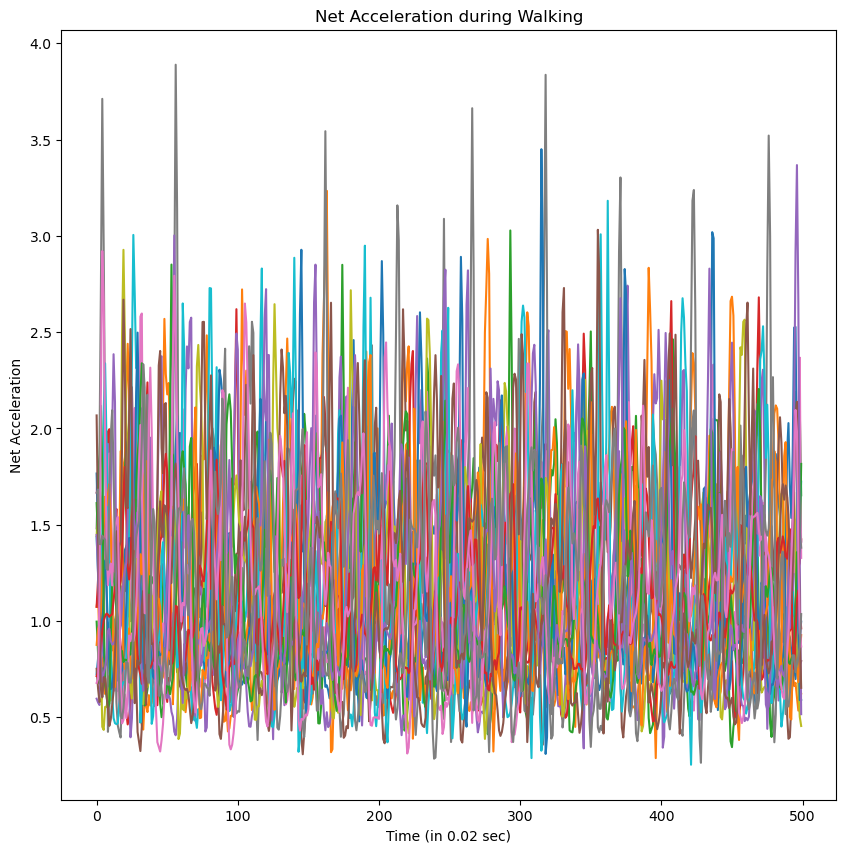

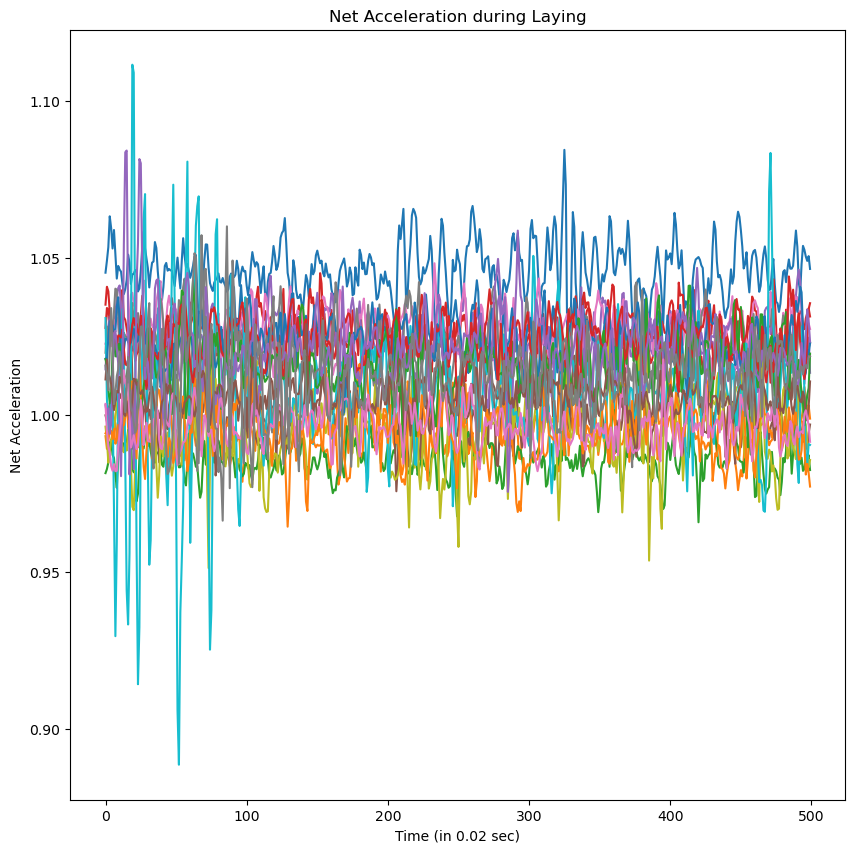

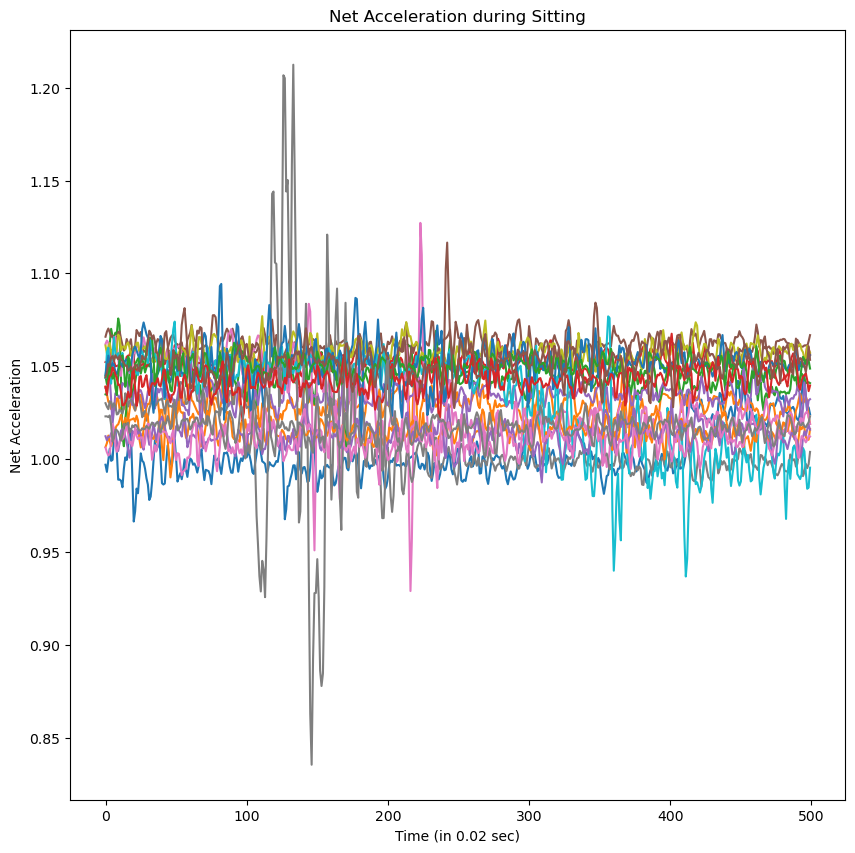

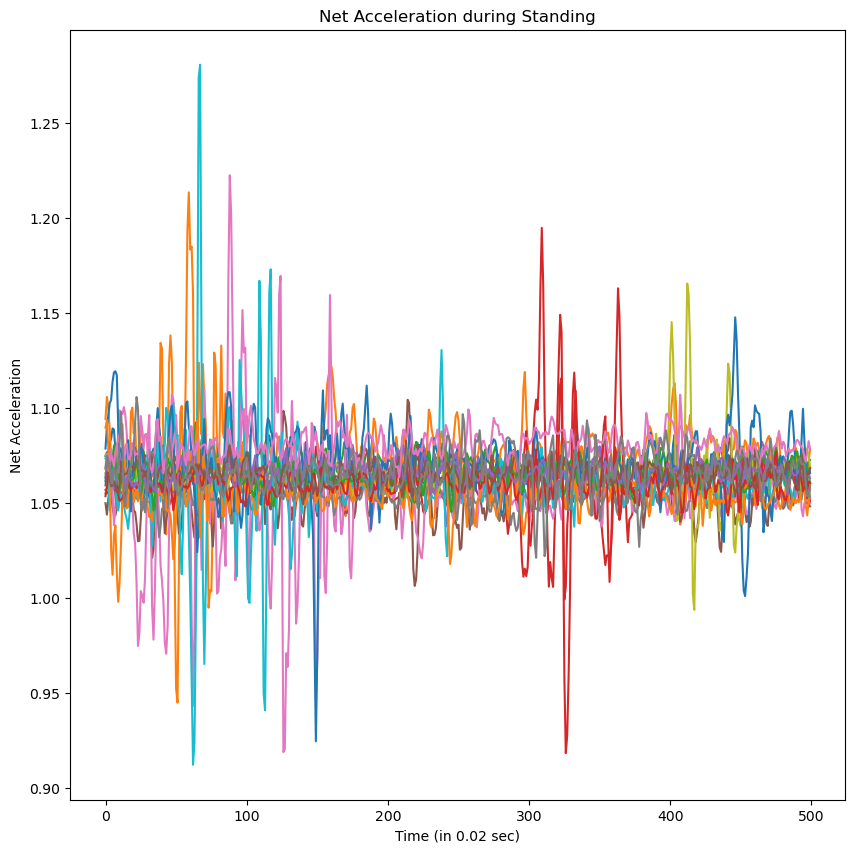

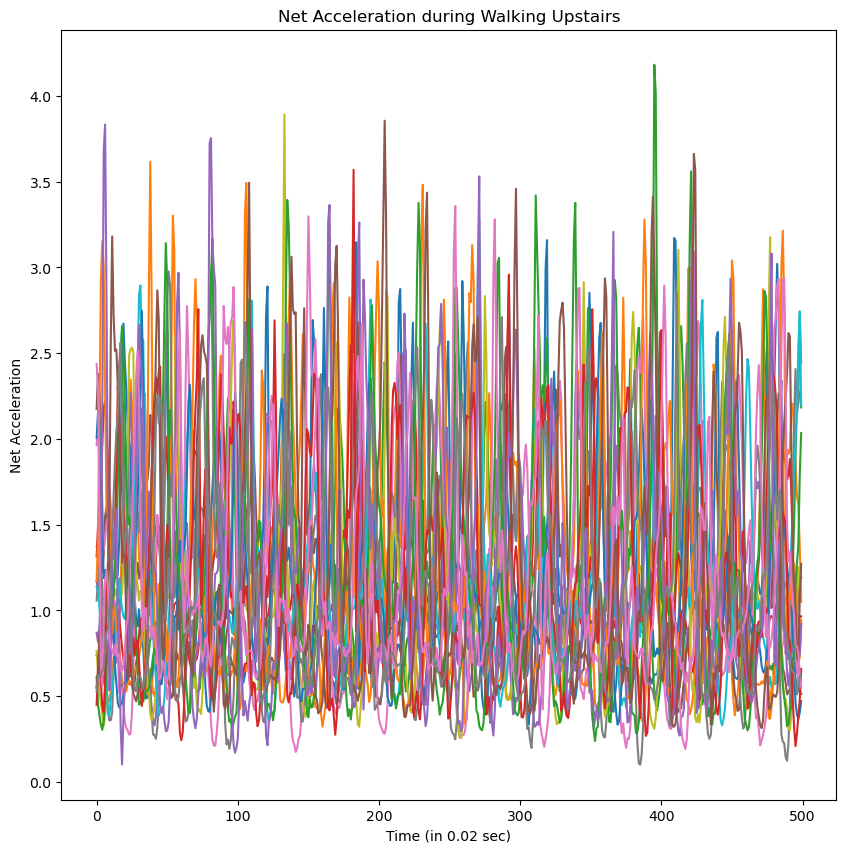

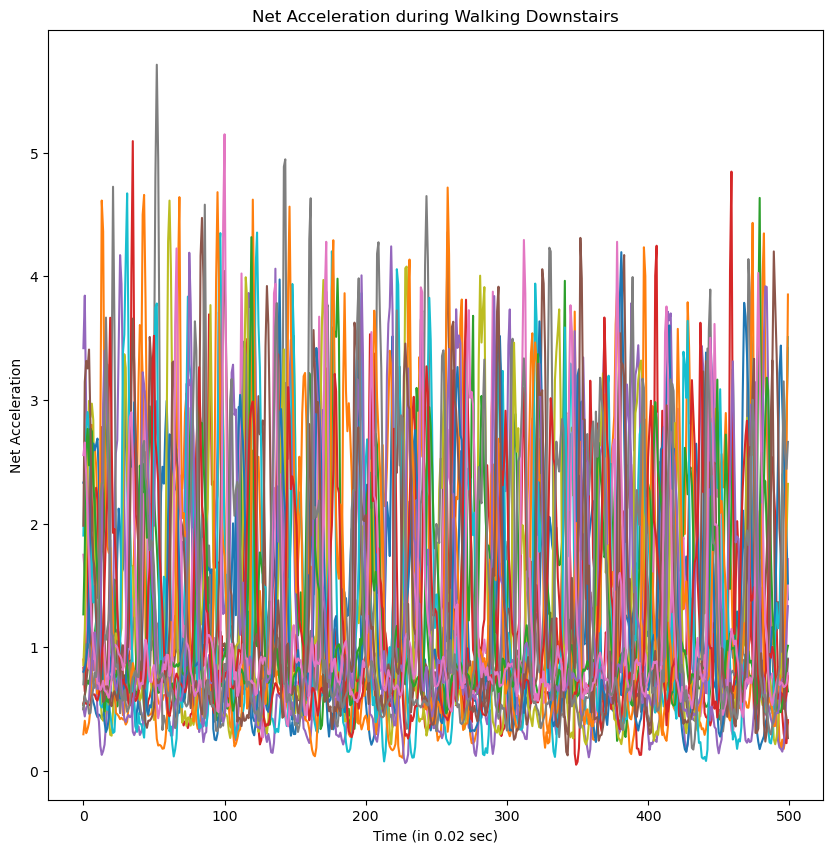

In [18]:
plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for walking
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["WALKING"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Walking")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")


plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for laying
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["LAYING"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Laying")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")


plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for sitting
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["SITTING"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Sitting")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")


plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for standing
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["STANDING"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Standing")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")


plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for walking upstairs
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["WALKING_UPSTAIRS"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Walking Upstairs")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")


plt.figure(figsize=(10, 10)) # Plotting the net acceleration for each sample in the train set for walking downstairs
for i in range((a_net_train_arr.shape[0])):
    if y_train[i] == classes["WALKING_DOWNSTAIRS"]:
        plt.plot(a_net_train_arr[i])
plt.title("Net Acceleration during Walking Downstairs")
plt.xlabel("Time (in 0.02 sec)")
plt.ylabel("Net Acceleration")

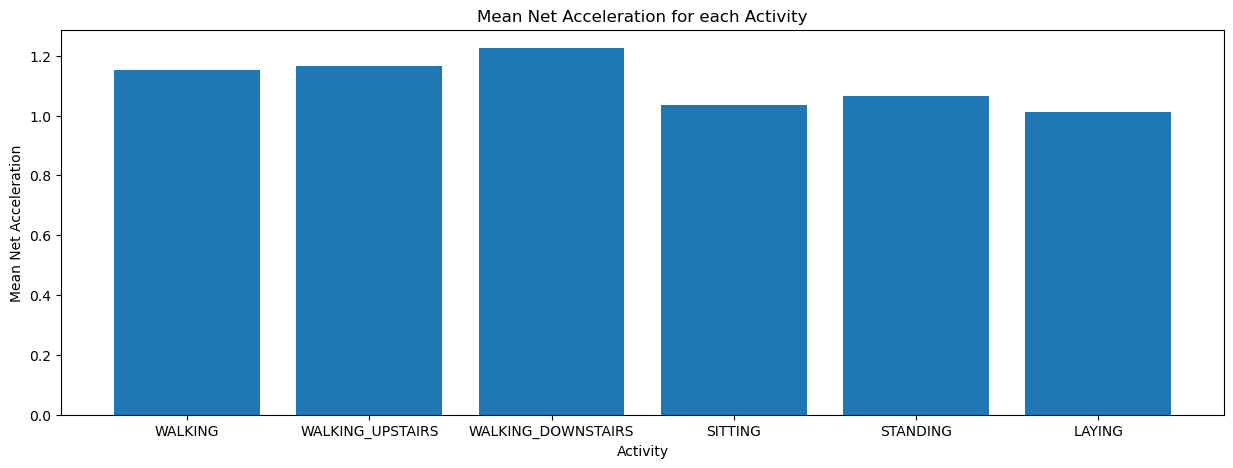

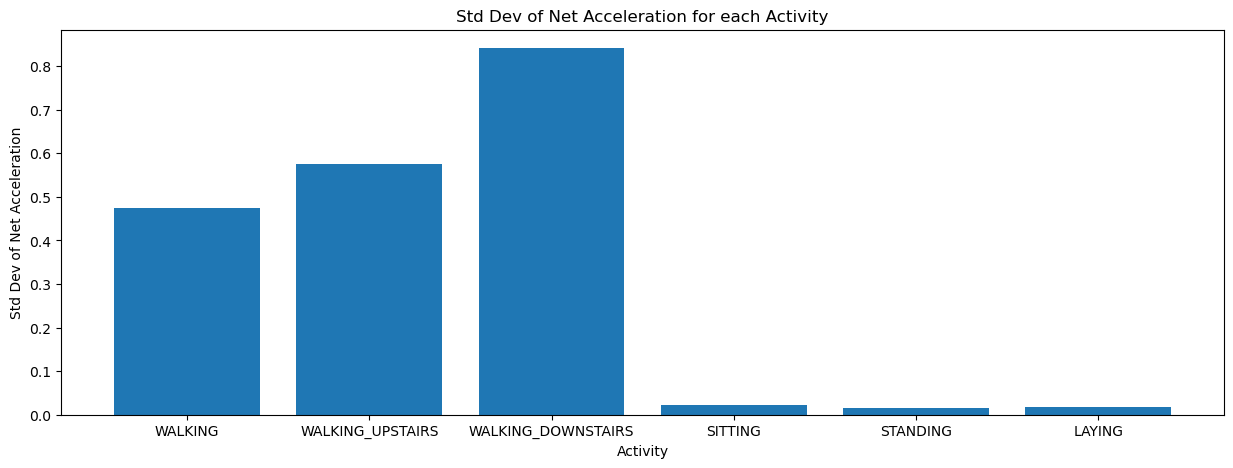

In [19]:
overall_mean_array = [] # Calculating the overall mean of the net acceleration for each activity
overall_std_dev_array = [] # Calculating the overall standard deviation of the net acceleration for each activity
for i in classes.keys():
    overall_mean_array.append(np.mean(np.mean(a_net_train_arr[y_train==classes[i]],axis=0))) # appending the mean of the net acceleration for each activity
    overall_std_dev_array.append(np.mean(np.std(a_net_train_arr[y_train==classes[i]],axis=0))) # appending the mean of the standard deviation of the net acceleration for each activity

overall_mean_array = np.array(overall_mean_array)
overall_std_dev_array = np.array(overall_std_dev_array)


# Plotting the overall mean and standard deviation of the net acceleration for each activity
plt.figure(figsize=(15, 5))
plt.bar(classes.keys(),overall_mean_array)
plt.title("Mean Net Acceleration for each Activity")
plt.xlabel("Activity")
plt.ylabel("Mean Net Acceleration")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(classes.keys(),overall_std_dev_array)
plt.title("Std Dev of Net Acceleration for each Activity")
plt.xlabel("Activity")
plt.ylabel("Std Dev of Net Acceleration")
plt.show()

<style>p {text-align: left; font-family: "Times New Roman";}</style>

<p>3. Train Decision Tree using trainset and report Accuracy and confusion matrix using testset. <b>[1 mark]</b></p>

In [20]:
acc_net_test_df = pd.DataFrame(a_net_test_arr) # Creating a dataframe for the net acceleration for each sample in the test set
acc_net_val_df = pd.DataFrame(a_net_val_arr) # Creating a dataframe for the net acceleration for each sample in the validation set
acc_net_train_df = pd.DataFrame(a_net_train_arr) # Creating a dataframe for the net acceleration for each sample in the train set

X_train_val = np.concatenate((a_net_train_arr, a_net_val_arr), axis=0) # Combining the train and validation parts of the dataset
y_train_val = np.concatenate((y_train, y_val), axis=0) # Combining the train and validation parts of the labels

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42) # Creating a decision tree classifier
dec_tree.fit(X_train_val, y_train_val) # Fitting the decision tree classifier on the train and validation parts of the dataset

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

Model accuracy on test set: 0.5277777777777778


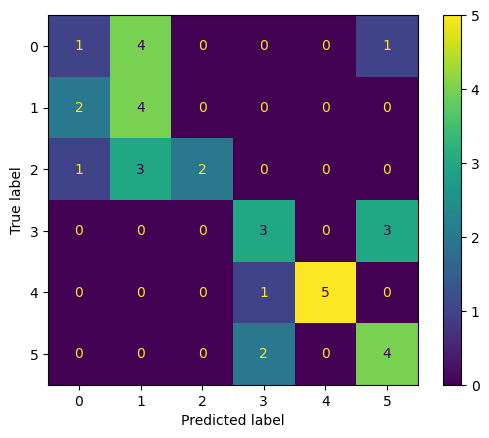

In [21]:
y_pred = dec_tree.predict(a_net_test_arr) # Predicting the labels for the test set
print(f"Model accuracy on test set: {accuracy_score(y_test, y_pred)}") # Printing the accuracy of the model on the test set
cm = confusion_matrix(y_test, y_pred) # Calculating the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Creating a confusion matrix display
disp.plot() # Plotting the confusion matrix
plt.show() # Displaying the confusion matrix

<style>p {text-align: left; font-family: "Times New Roman";}</style>

<p>4. Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained. <b>[1 mark]</b></p>

<style>
    p {font-family:"Times New Roman"}
</style>
<u>Answer:</u>
<p> The decision tree of various depths has been formed and the accuracy measures have been plotted for different heights. The main observations were that the highest possible accuracy with this data is 61%. The accuracy plot against the height of the tree shows that the accuracy on smaller heights of trees is quite low, and then gradually increases, after which it attains a stable value with minor fluctuations within the window of observation </p>

Accuracy Score for max depth =  2 is 0.4444444444444444
Confusion Matrix for max depth =  2


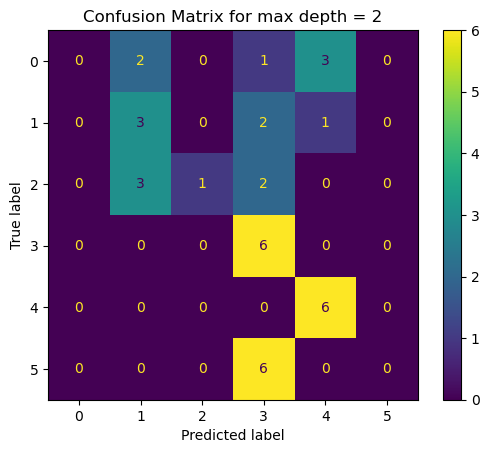

-----------------------------------------------------------
Accuracy Score for max depth =  3 is 0.5277777777777778
Confusion Matrix for max depth =  3


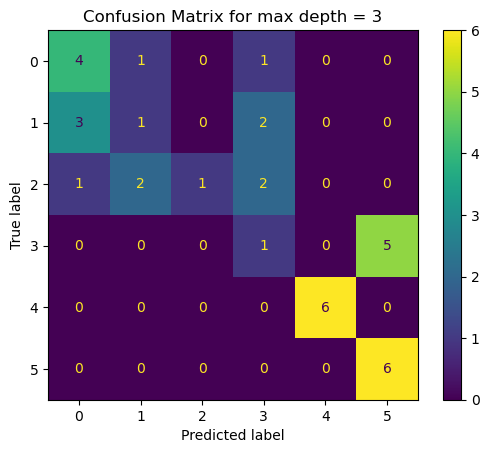

-----------------------------------------------------------
Accuracy Score for max depth =  4 is 0.5555555555555556
Confusion Matrix for max depth =  4


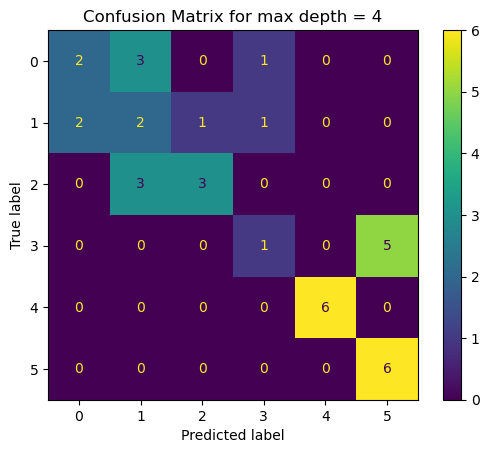

-----------------------------------------------------------
Accuracy Score for max depth =  5 is 0.5277777777777778
Confusion Matrix for max depth =  5


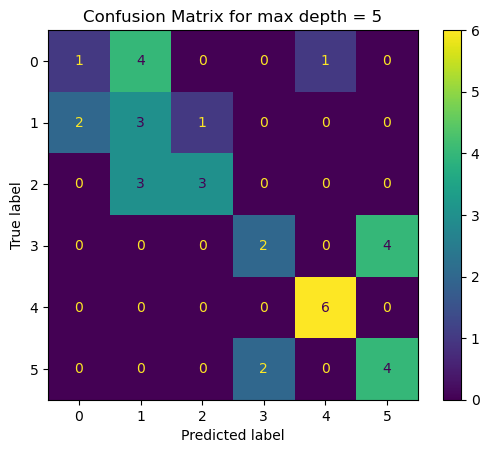

-----------------------------------------------------------
Accuracy Score for max depth =  6 is 0.5
Confusion Matrix for max depth =  6


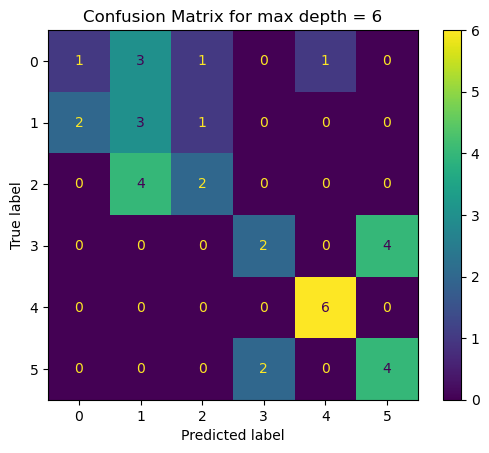

-----------------------------------------------------------
Accuracy Score for max depth =  7 is 0.5833333333333334
Confusion Matrix for max depth =  7


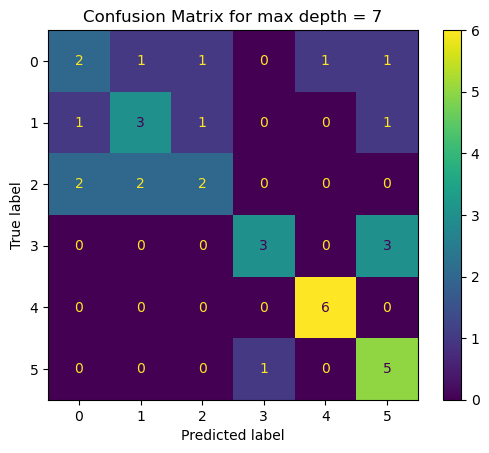

-----------------------------------------------------------
Accuracy Score for max depth =  8 is 0.5
Confusion Matrix for max depth =  8


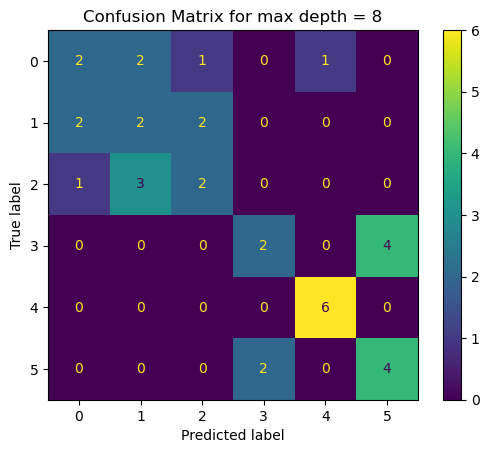

-----------------------------------------------------------


In [22]:
dict_heightVSaccuracy = {} # Creating a dictionary for storing the accuracy of the model for each max depth
for i in range(2, 9): # Looping over the max depth
    dtree = DecisionTreeClassifier(max_depth=i) # Creating a decision tree classifier of max depth = i
    dtree.fit(X_train_val, y_train_val) # Fitting the decision tree classifier on the train and validation parts of the dataset
    ypred = dtree.predict(a_net_test_arr) # Predicting the labels for the test set
    print("Accuracy Score for max depth = ", i, "is", accuracy_score(y_test, ypred)) # Printing the accuracy of the model on the test set
    print("Confusion Matrix for max depth = ", i) # Printing the confusion matrix
    dict_heightVSaccuracy[i] = accuracy_score(y_test, ypred) # Storing the accuracy of the model for each max depth
    cm = confusion_matrix(y_test, ypred) # Calculating the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Creating a confusion matrix display
    disp.plot() # Plotting the confusion matrix
    plt.title("Confusion Matrix for max depth = "+str(i))
    plt.show()
    print("-----------------------------------------------------------")

Text(0.5, 1.0, 'The accuracy of the tree for various tree depths')

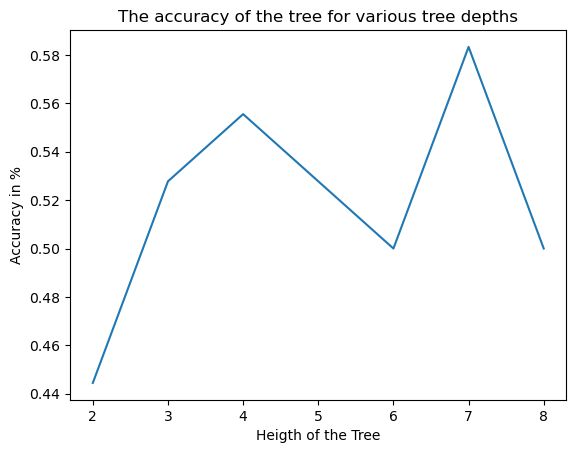

In [23]:
acc_axis = dict_heightVSaccuracy.values() # Creating an array for storing the accuracy of the model for each max depth
height_axis = dict_heightVSaccuracy.keys() # Creating an array for storing the max depth

plt.figure() 
plt.plot(height_axis, acc_axis)# Plotting the accuracy of the model for each max depth 
plt.xlabel("Heigth of the Tree")
plt.ylabel("Accuracy in %")
plt.title("The accuracy of the tree for various tree depths")

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p>5. Use PCA (Principal Component Analysis) on Total Acceleration acc<sub>x</sub><sup>2</sup>+acc<sub>y</sub><sup>2</sup>+acc<sub>z</sub><sup>2</sup> to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use TSFEL at <a>https://tsfel.readthedocs.io/en/latest/</a> (a featurizer library, <a>https://github.com/fraunhoferportugal/tsfel</a>) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference? <b>[2 marks]</b></p>

In [24]:
pca = PCA(n_components=2) # Creating a PCA object
pca_xtrain = pca.fit_transform(X_train_val) # Fitting the PCA object on the train and validation parts of the dataset
pca_xtrain_df = pd.DataFrame(data = pca_xtrain, columns = ['PC1', 'PC2']) # Creating a dataframe for the PCA components
print("The shape of the PCA object is", pca_xtrain_df.shape)


The shape of the PCA object is (144, 2)


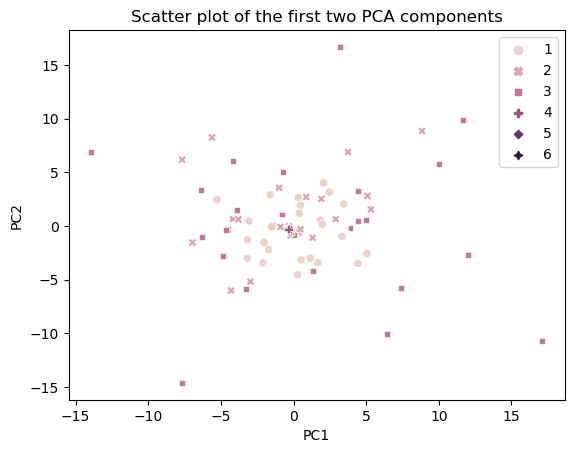

In [25]:
sns.scatterplot(x='PC1', y='PC2', style=y_train_val, data=pca_xtrain_df, hue = y_train_val) # Plotting the scatter plot of the first two PCA components
plt.title("Scatter plot of the first two PCA components")
plt.show()

In [26]:
fig = px.scatter(pca_xtrain_df, x='PC1', y='PC2', color=y_train_val, title="Interactive scatter plot of the first two PCA components") # Plotting the Interactive scatter plot of the first two PCA components in Plotly
fig.show()

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p>We can observe from the above plots that the PCA has not captured the distributiin well and the datapoints still appear to be too much scattered. We can observe this by zooming into the plotly plot. the Decision tree classifier would not be able to for complicated decision boundaries if we restrict its height, and hence, this dataset may not be suitable for classification by Decisionn Tree. In the next part we will use TSFEL.</p>

In [27]:
# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()
features_xTrainVal_lis = [] # Creating a list for storing the features for each sample in the train and validation parts of the dataset
for i in range(len(X_train_val)): # Looping over the train and validation parts of the dataset
    features_xTrainVal_lis.append(np.array(tsfel.time_series_features_extractor(cfg, X_train_val[i]))) # Extracting the features for each sample in the train and validation parts of the dataset and appending it to the list


features_xTrainVal_arr = np.array(features_xTrainVal_lis).reshape(144, 384) # Converting the list to an array and reshaping it

*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.



C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2571586442.py:5: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***


In [28]:
features_xTest_lis = [] # Creating a list for storing the features for each sample in the test set
for i in range(len(a_net_test_arr)): # Looping over the test set
    features_xTest_lis.append(np.array(tsfel.time_series_features_extractor(cfg, a_net_test_arr[i]))) # Extracting the features for each sample in the test set and appending it to the list

features_xTest_arr = np.array(features_xTest_lis).reshape(36, 384) # Converting the list to an array and reshaping it

*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***
*** Feature extraction started ***


C:\Users\Admin\AppData\Local\Temp\ipykernel_28928\2383863989.py:3: UserWarning:

Using default sampling frequency set in configuration file.




*** Feature extraction finished ***


In [29]:
features_xTrainVal_df = pd.DataFrame(features_xTrainVal_arr) # Creating a dataframe for the features for each sample in the train and validation parts of the dataset
pca_features = PCA(n_components=2) # Creating a PCA object
pca_features_xTrainVal_df = pca_features.fit_transform(features_xTrainVal_df) # Fitting the PCA object on the train and validation parts of the dataset
pca_features_xTrainVal_df = pd.DataFrame(data = pca_features_xTrainVal_df, columns = ['PC1', 'PC2']) # Creating a dataframe for the PCA components with PCA1 and PCA2 as the column names

pca_features_xTrainVal_df

PC1         PC2
0    -60364.800227  103.896120
1    -56462.115195   78.688661
2     53312.088303 -111.323302
3     64464.474773  -50.047976
4    -61276.714304   75.360219
..             ...         ...
139  -62462.292160 -229.762588
140  -61921.175718   76.681163
141  -59797.602988  113.475821
142  164908.533277  324.014994
143  -63022.117872   -5.227156

[144 rows x 2 columns]

In [30]:
pca_features_xTest_df = pca_features.transform(features_xTest_arr) # Transforming the test set using the PCA object
pca_features_xTest_df = pd.DataFrame(data = pca_features_xTest_df, columns = ['PC1', 'PC2']) # Creating a dataframe for the PCA components with PCA1 and PCA2 as the column names

pca_features_xTest_df

PC1         PC2
0   126705.816999 -142.870051
1   114420.406694   25.581694
2   -60358.555151 -192.100576
3    33406.268313 -169.184097
4   -63975.105926   39.229320
5   -56896.299317   76.851615
6   -64417.810919 -132.410510
7    38291.883139 -132.215494
8    26658.779634 -156.387241
9    77342.821967  -97.982130
10  -60721.504382   99.512664
11  -62963.682667   34.080891
12   31698.392249   -0.416199
13  -60179.594001   80.274785
14  107594.340739  -68.394223
15  -64358.324948 -215.568201
16  -60569.142610  106.067130
17  -61053.744671   98.804138
18   14985.015533  -35.365530
19  -64497.571277 -265.489829
20  -62185.755492   79.155303
21   22835.497256  -85.171618
22   24053.837320  -73.734717
23  -60734.681504  106.766987
24   49362.762557   -6.863267
25   45297.664046  -36.007841
26  160148.021810  193.496016
27  -64596.872966 -116.141656
28   49732.525042 -136.537150
29  -62450.684823   86.225684
30  -65528.820594 -255.450176
31  -64450.436252   53.255640
32  -63607.907278   52.093678
33   55318.285204  -85.115503
34   41124.937638 -112.829944
35   15590.697784 -193.285738

In [32]:
import pickle # Importing the pickle library for pickling the PCA object

filename = 'Final Model\\pca_features_A1.sav' # Path for the PCA object
pickle.dump(pca_features, open(filename, 'wb')) # Pickling/Saving the PCA object

Text(0, 0.5, 'PC2')

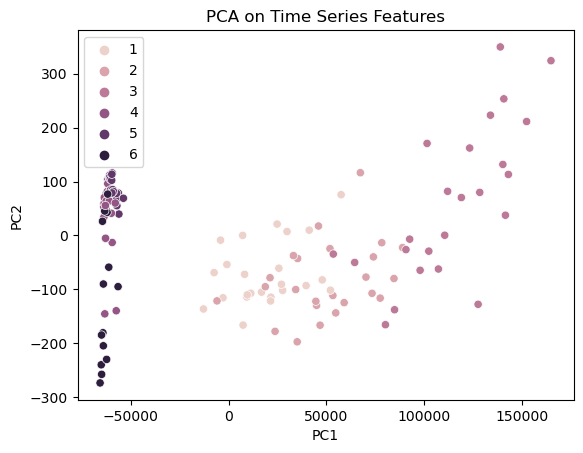

In [33]:
sns.scatterplot(x='PC1', y='PC2', hue=y_train_val, data=pca_features_xTrainVal_df) # Plotting the scatter plot of the first two PCA components of the features for each sample in the train and validation parts of the dataset
plt.title('PCA on Time Series Features')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [34]:
fig = px.scatter(pca_features_xTrainVal_df, x='PC1', y='PC2', color=y_train_val, title="Interactive scatter plot of the first two PCA components of the features for each sample in the train and validation parts of the dataset") # Plotting the Interactive scatter plot of the first two PCA components of the features for each sample in the train and validation parts of the dataset in Plotly
fig.show()

Text(0, 0.5, 'PC2')

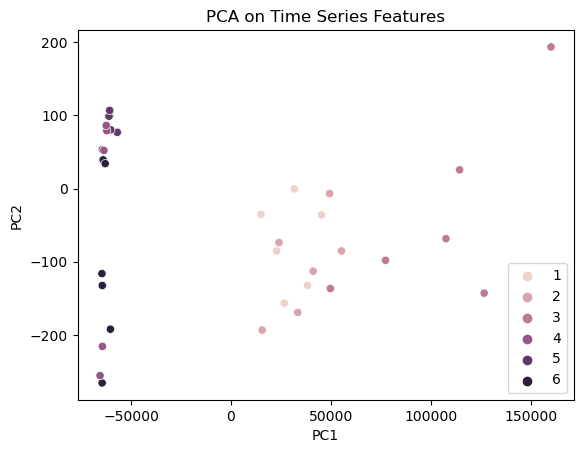

In [35]:
sns.scatterplot(x='PC1', y='PC2', hue=y_test, data=pca_features_xTest_df)
plt.title('PCA on Time Series Features')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [36]:
fig = px.scatter(pca_features_xTest_df, x='PC1', y='PC2', color=y_test, title="Interactive scatter plot of the first two PCA components of the features for each sample in the test set") # Plotting the Interactive scatter plot of the first two PCA components of the features for each sample in the test set in Plotly
fig.show()

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p> In the scatter plots from plotly, the main thing that we can see that the classes are much segregated in the scatter plot after the Time series feature extraction compared to before it. So, it is a better option to perform the Time series feature extraction and then perform PCA as the activities are distinctly visible in their respective clusters for which it is relatively easier to form decision boundaries</p>

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p>Q6. Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question. <b>[2 marks]</b></p>

Text(0.5, 1.0, 'The Mean Cross Validation Accuracy against the height of the tree')

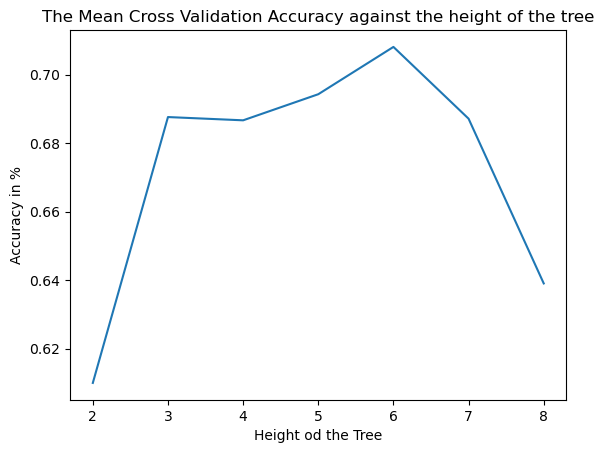

In [37]:
dict_heightVSaccuracy1 = {} # Creating a dictionary for storing the accuracy of the model for each max depth
for i in range(2,9): # Looping over the max depth
    dtree = DecisionTreeClassifier(max_depth=i) # Creating a decision tree classifier of max depth = i
    arr = cross_val_score(dtree, pca_features_xTrainVal_df, y_train_val, cv=10) # Calculating the cross validation score
    dict_heightVSaccuracy1[i] = arr.mean() # Storing the accuracy of the model for each max depth
plt.plot(dict_heightVSaccuracy1.keys(), dict_heightVSaccuracy1.values()) # Plotting the accuracy of the model for each max depth
plt.xlabel("Height od the Tree")
plt.ylabel("Accuracy in %")
plt.title("The Mean Cross Validation Accuracy against the height of the tree")

Accuracy Score for max depth =  2 is 0.5555555555555556
Confusion Matrix for max depth =  2


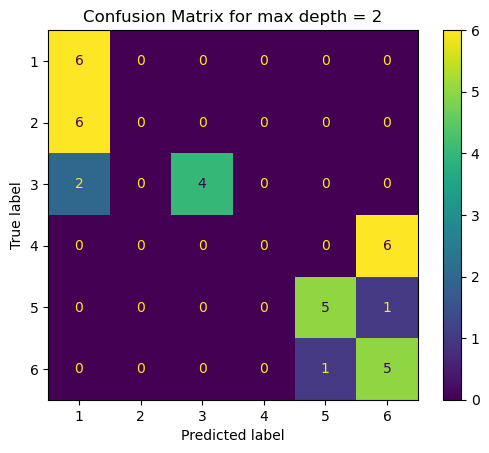

-----------------------------------------------------------
Accuracy Score for max depth =  3 is 0.6944444444444444
Confusion Matrix for max depth =  3


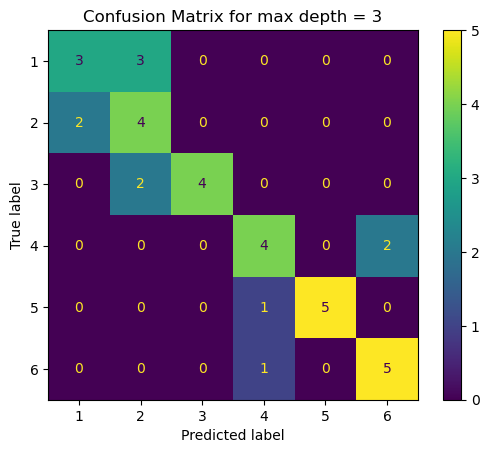

-----------------------------------------------------------
Accuracy Score for max depth =  4 is 0.7222222222222222
Confusion Matrix for max depth =  4


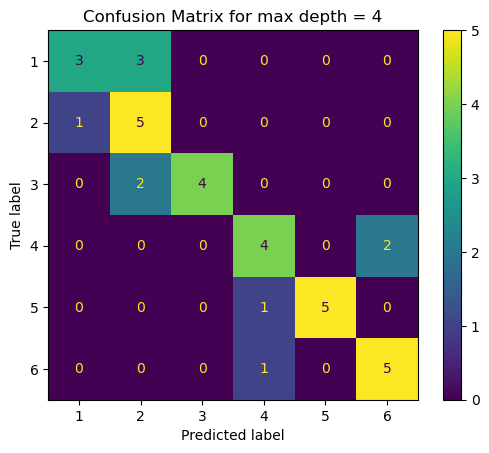

-----------------------------------------------------------
Accuracy Score for max depth =  5 is 0.6111111111111112
Confusion Matrix for max depth =  5


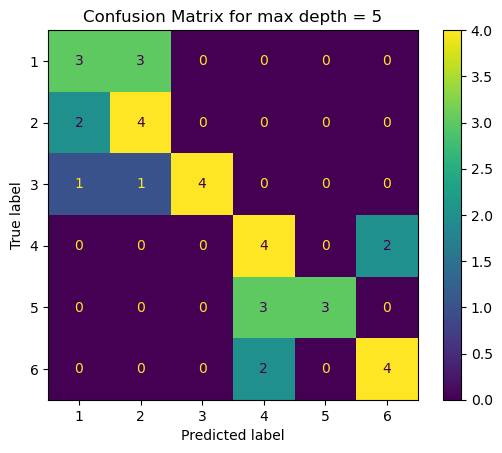

-----------------------------------------------------------
Accuracy Score for max depth =  6 is 0.6111111111111112
Confusion Matrix for max depth =  6


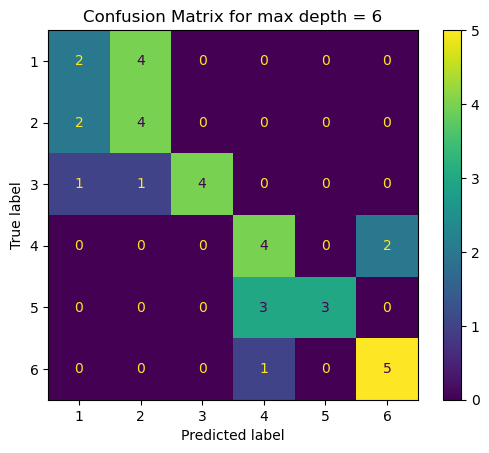

-----------------------------------------------------------
Accuracy Score for max depth =  7 is 0.6111111111111112
Confusion Matrix for max depth =  7


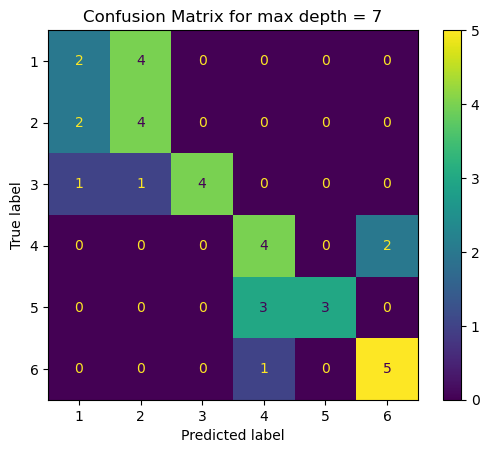

-----------------------------------------------------------
Accuracy Score for max depth =  8 is 0.6388888888888888
Confusion Matrix for max depth =  8


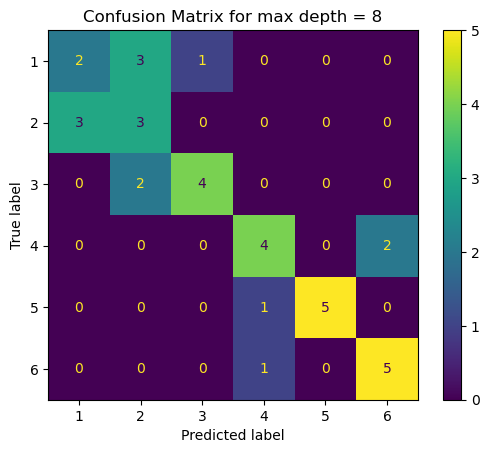

-----------------------------------------------------------


In [38]:
dict_heightVSaccuracy2 = {} # Creating a dictionary for storing the accuracy of the model for each max depth
for i in range(2, 9): # Looping over the max depth
    dtree = DecisionTreeClassifier(max_depth=i) # Creating a decision tree classifier of max depth = i
    dtree.fit(pca_features_xTrainVal_df, y_train_val) # Fitting the decision tree classifier on the train and validation parts of the dataset
    ypred = dtree.predict(pca_features_xTest_df) # Predicting the labels for the test set
    print("Accuracy Score for max depth = ", i, "is", accuracy_score(y_test, ypred)) # Printing the accuracy of the model on the test set
    print("Confusion Matrix for max depth = ", i) # Printing the confusion matrix
    dict_heightVSaccuracy2[i] = accuracy_score(y_test, ypred) # Storing the accuracy of the model for each max depth
    cm = confusion_matrix(y_test, ypred) # Calculating the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_) # Creating a confusion matrix display
    disp.plot() # Plotting the confusion matrix
    plt.title("Confusion Matrix for max depth = "+str(i)) 
    plt.show()
    print("-----------------------------------------------------------")

Text(0.5, 1.0, 'Accuracy vs Height plot for PCA on Time Series features')

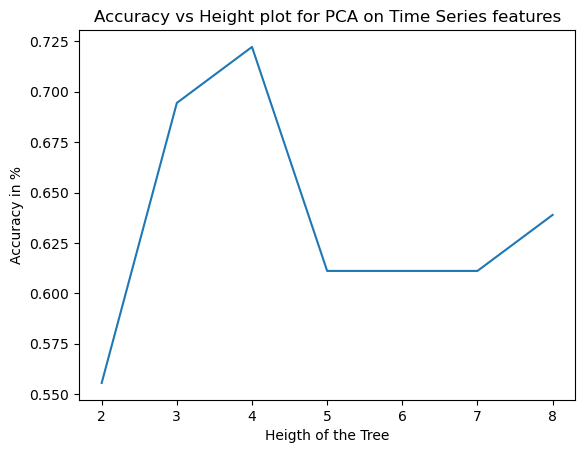

In [39]:
acc_axis = dict_heightVSaccuracy2.values() # Creating an array for storing the accuracy of the model for each max depth for PCA on Time Series Features
height_axis = dict_heightVSaccuracy.keys() # Creating an array for storing the max depth

plt.figure()
plt.plot(height_axis, acc_axis)
plt.xlabel("Heigth of the Tree")
plt.ylabel("Accuracy in %")
plt.title("Accuracy vs Height plot for PCA on Time Series features")

Text(0.5, 1.0, 'Accuracy vs Height of Tree')

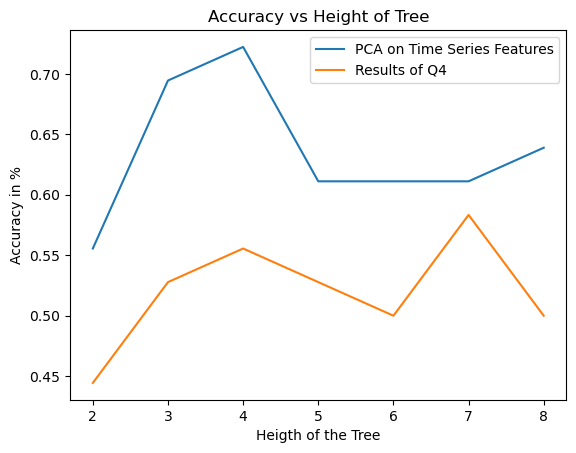

In [40]:
acc_features_axis = dict_heightVSaccuracy2.values() # Creating an array for storing the accuracy of the model for each max depth for PCA on Time Series Features
acc_noTSFEL_axis = dict_heightVSaccuracy.values() # Creating an array for storing the accuracy of the model for each max depth no PCA and no TSFEL (Q4)
height_axis = dict_heightVSaccuracy.keys() # Creating an array for storing the max depth

plt.figure()
plt.plot(height_axis, acc_features_axis, label="PCA on Time Series Features") # Plotting the accuracy of the model for each max depth for PCA on Time Series Features
plt.plot(height_axis, acc_noTSFEL_axis, label="Results of Q4") # Plotting the accuracy of the model for each max depth no PCA and no TSFEL (Q4)
plt.xlabel("Heigth of the Tree")
plt.ylabel("Accuracy in %")
plt.legend()
plt.title("Accuracy vs Height of Tree")

In [41]:
final_dtree = DecisionTreeClassifier(max_depth=4) # Creating a decision tree classifier of max depth = 4 (Final Model)
final_dtree.fit(pca_features_xTrainVal_df, y_train_val) # Fitting the decision tree classifier on the train and validation parts of the dataset
ypred = final_dtree.predict(pca_features_xTest_df) # Predicting the labels for the test set
print("The Accuracy Score of the Final Model is", accuracy_score(y_test, ypred)*100, "%") # Printing the accuracy of the model on the test set

The Accuracy Score of the Final Model is 72.22222222222221 %


In [42]:
filename = 'Final Model\\final_tree_A1.sav' # Path for the Final Model
pickle.dump(final_dtree, open(filename, 'wb')) # Pickling/Saving the Final Model

loaded_model = pickle.load(open(filename, 'rb')) # Loading the Final Model

Text(0.5, 1.0, 'Final Model')

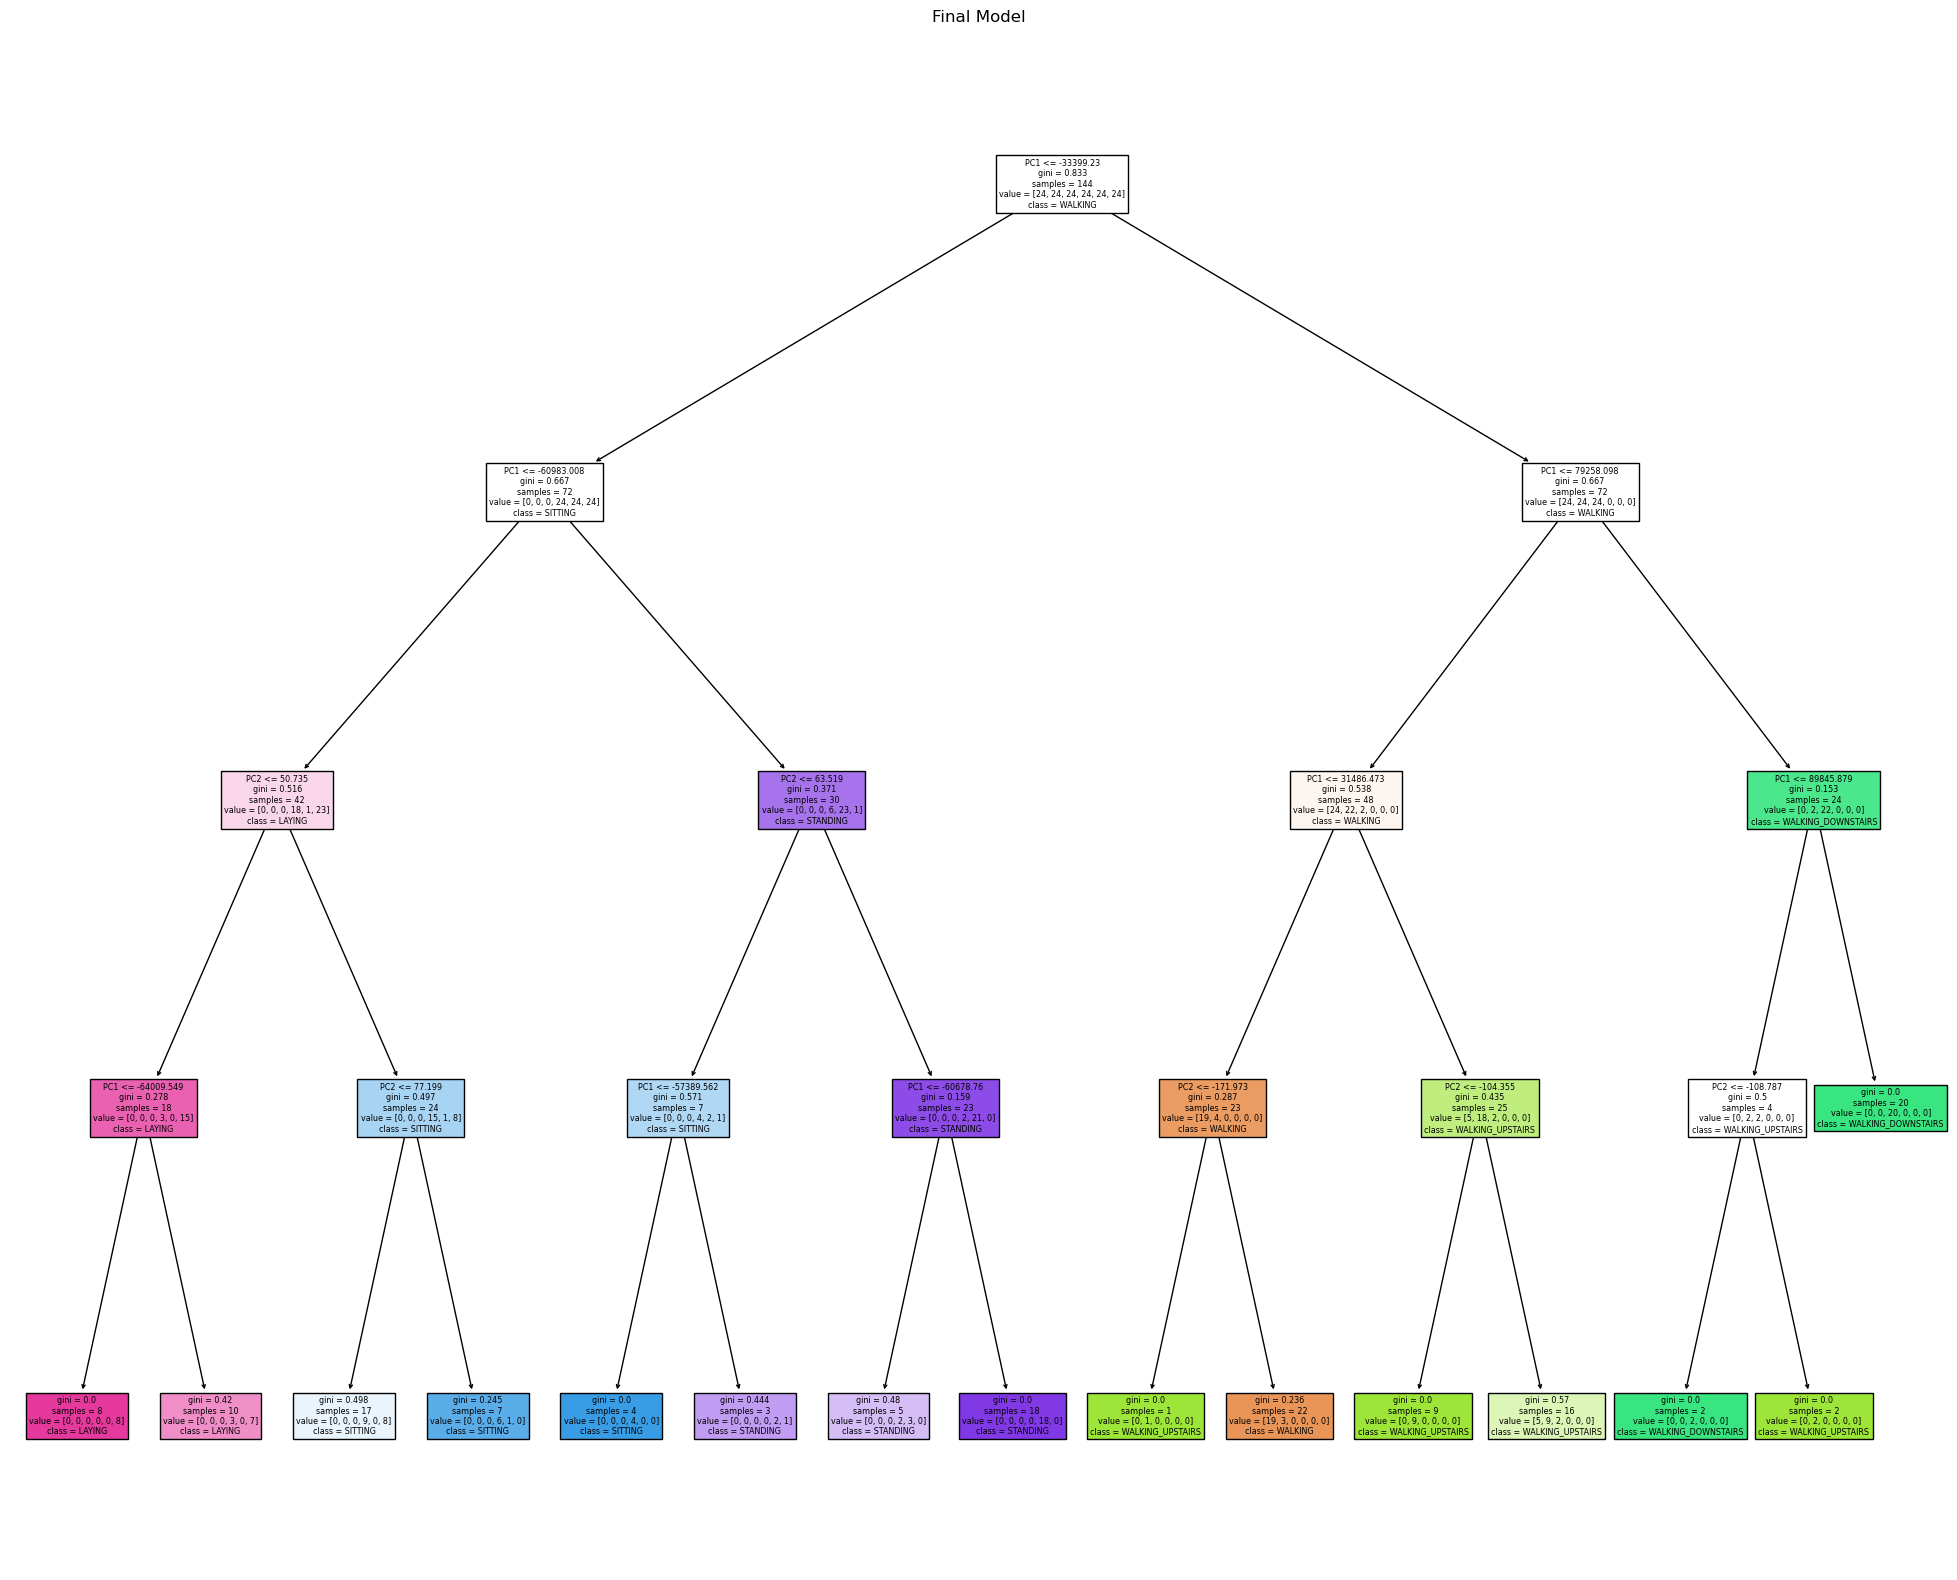

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(loaded_model,
                   feature_names=["PC1", "PC2"],  
                   class_names = ["WALKING","WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"] ,
                   filled=True) # Plotting the Final Model
plt.title("Final Model")

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p> We can observe that the accuracy of the tree on the test data is the maximum at the height of 4. So, the final tree is of height 4. We can also observe that the working of the model on the PCA of the timeseries of the dataset is much better than that on unprocessed dataset as we can see. We have also saved the model for later use.</p>

<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p>Q7. Are there any participants/ activitivies where the Model performace is bad? If Yes, Why? <b>[1 mark]</b></p>

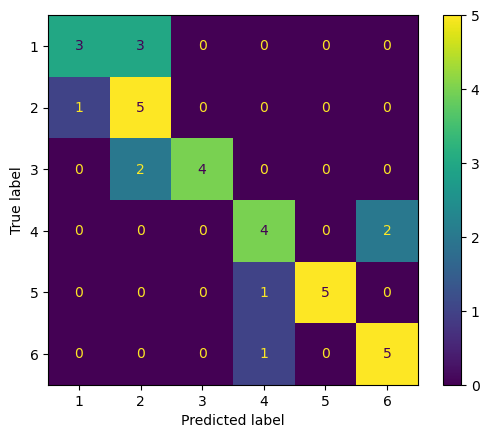

In [45]:
cm = confusion_matrix(y_test, ypred) # Calculating the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_) # Creating a confusion matrix display
disp.plot()
plt.show()

In [46]:
print(classification_report(y_test, ypred)) # Printing the classification report

              precision    recall  f1-score   support

           1       0.75      0.50      0.60         6
           2       0.50      0.83      0.62         6
           3       1.00      0.67      0.80         6
           4       0.67      0.67      0.67         6
           5       1.00      0.83      0.91         6
           6       0.71      0.83      0.77         6

    accuracy                           0.72        36
   macro avg       0.77      0.72      0.73        36
weighted avg       0.77      0.72      0.73        36



<style>p {text-align: left; font-family: "Times New Roman";}</style>
<p>The worst activity is the one with class 1 that is Walking. The Reason for this is that the model is frequently confusing the Walking activity with similar dynamic activities such as walking uowards, and walking downwards.</p>
